<a href="https://colab.research.google.com/github/idelahoussay2022/Stat-Class/blob/main/Delahoussaye_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [73]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [74]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [75]:
# url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [76]:
url = "https://docs.google.com/presentation/d/1CpNaM3-0hNdX6qI7nNeZpcUNBC3YFsF3ZlJ5K4yZJBg/edit#slide=id.p"

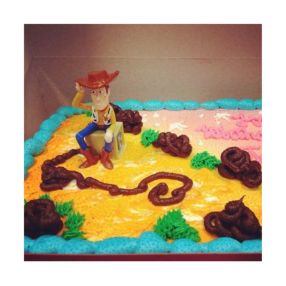

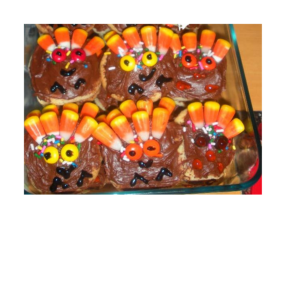

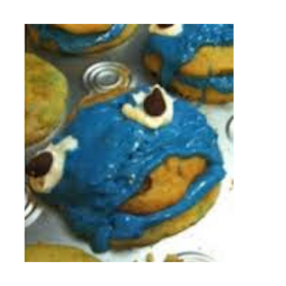

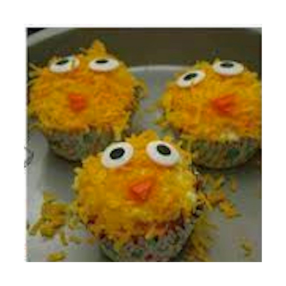

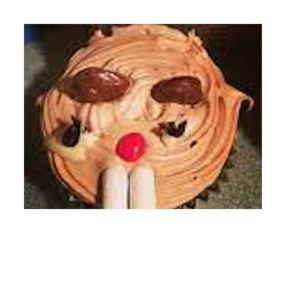

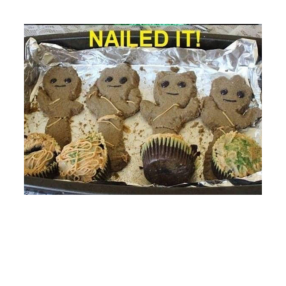

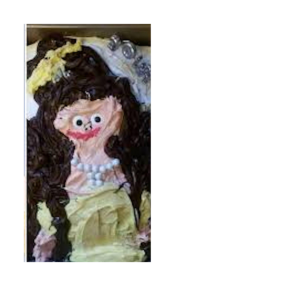

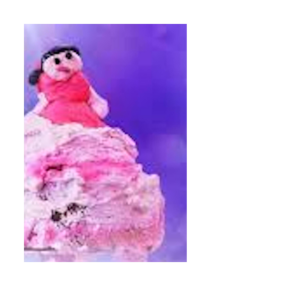

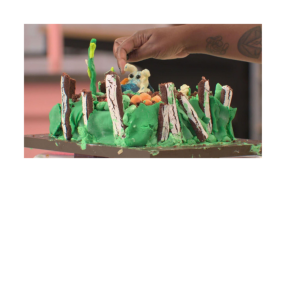

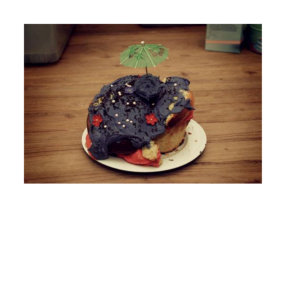

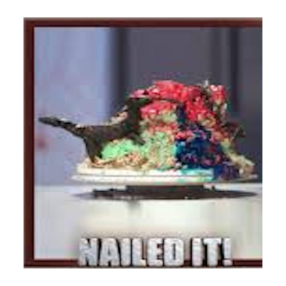

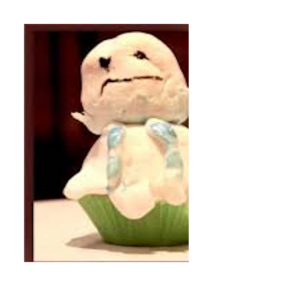

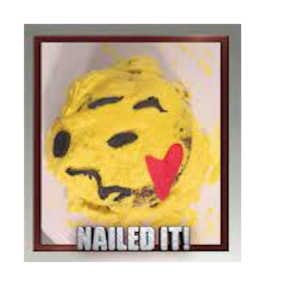

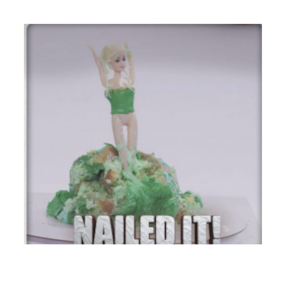

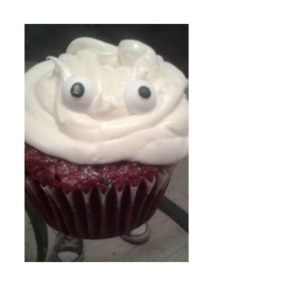

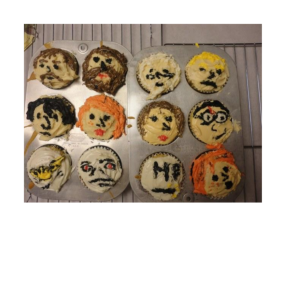

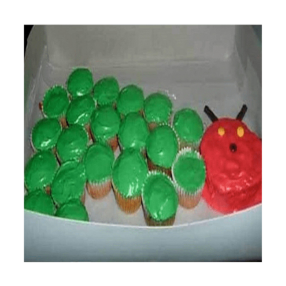

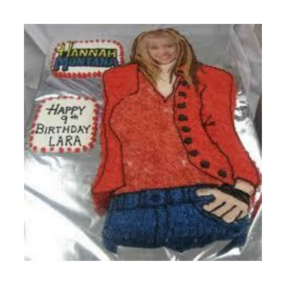

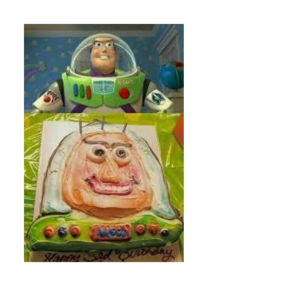

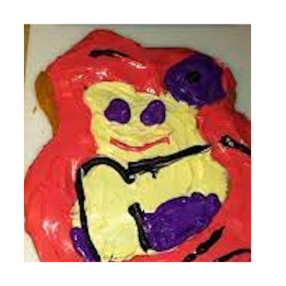

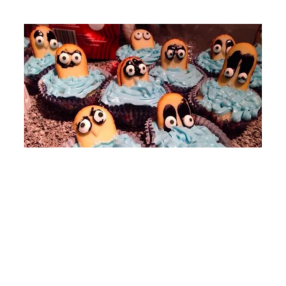

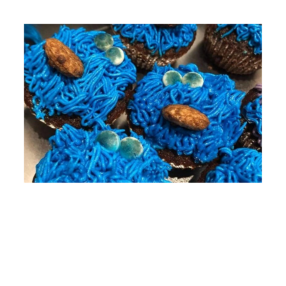

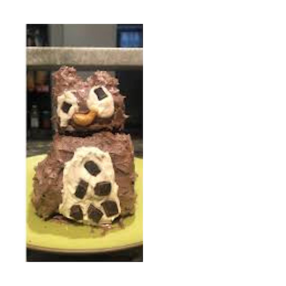

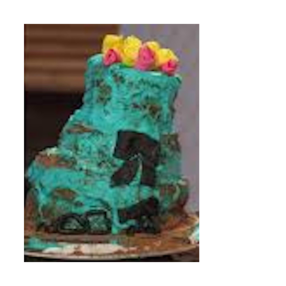

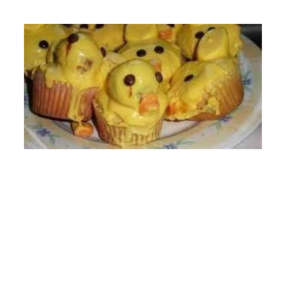

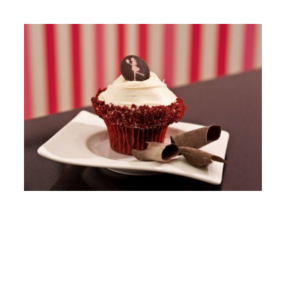

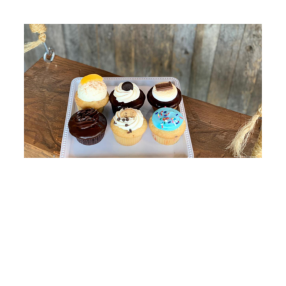

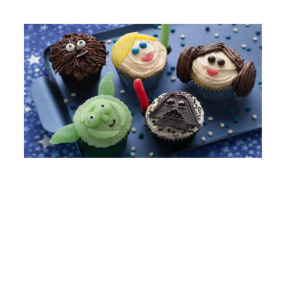

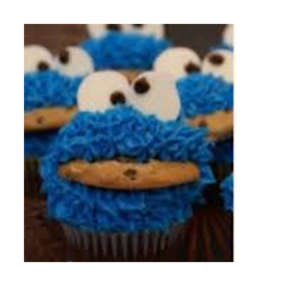

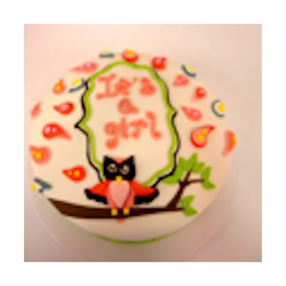

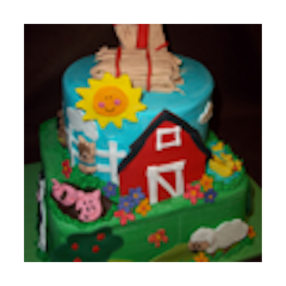

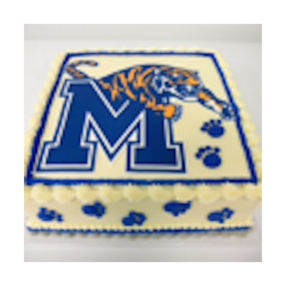

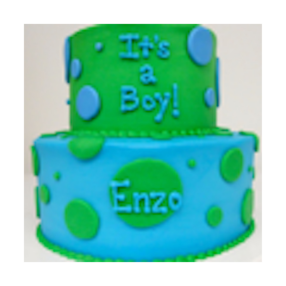

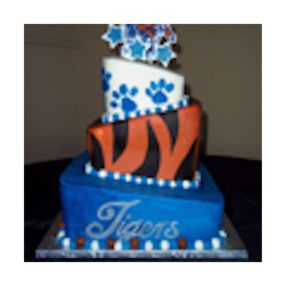

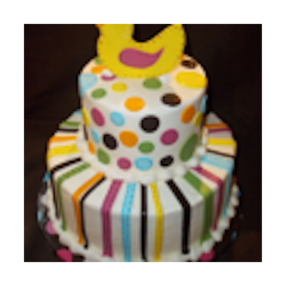

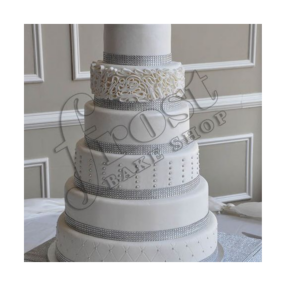

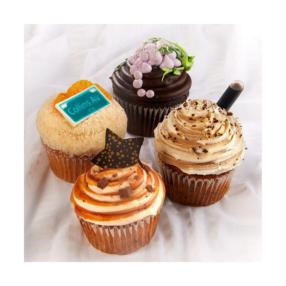

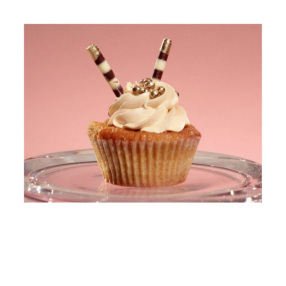

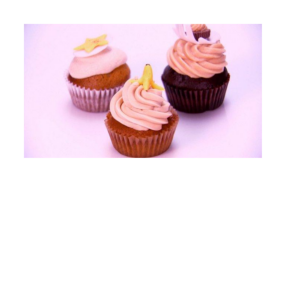

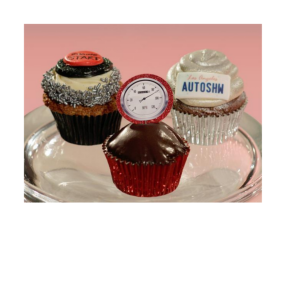

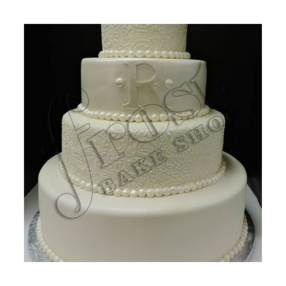

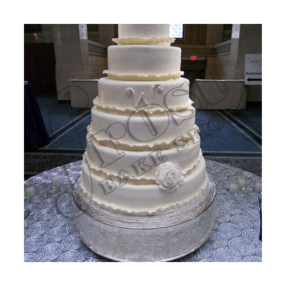

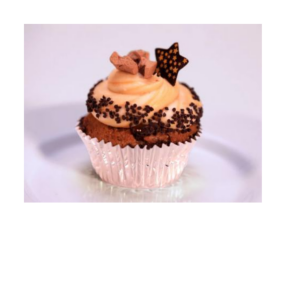

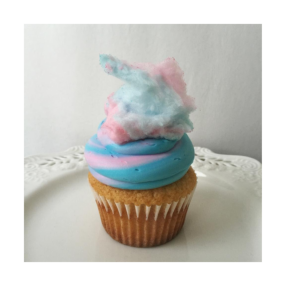

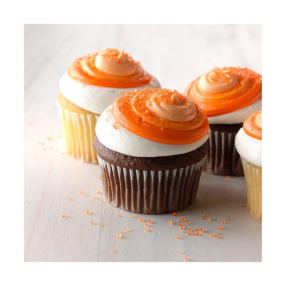

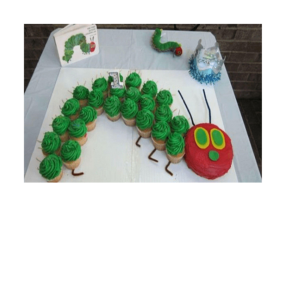

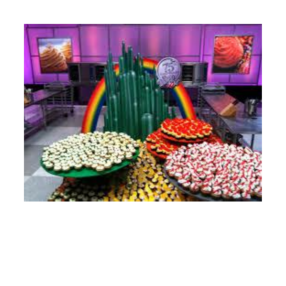

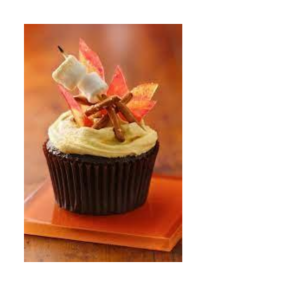

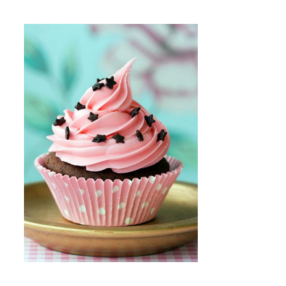

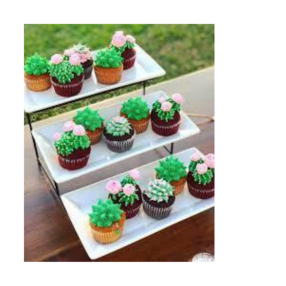

In [77]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [78]:
images.shape

torch.Size([50, 3, 224, 224])

In [79]:
model(images)

tensor([[-4.5687,  2.8029, -3.2691,  ..., -3.5402,  1.9669,  1.3134],
        [-1.9739,  0.8183, -4.0856,  ..., -2.2348,  7.7145,  0.9996],
        [ 1.9244,  1.9244, -3.4108,  ..., -2.7117,  0.5593,  0.2512],
        ...,
        [-2.7871, -0.5320, -5.8639,  ..., -0.2925,  1.8815,  3.6413],
        [-3.8199, -2.5191, -2.2937,  ..., -5.6009,  1.3353,  7.0577],
        [-5.7551, -2.9743, -4.0996,  ..., -5.4357,  1.9715,  5.3672]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [80]:
y = model(images)

In [81]:
y.shape

torch.Size([50, 1000])

In [82]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [83]:
for i in list(guesses):
    print(labels[i])

pencil box, pencil case
rotisserie
hourglass
screen, CRT screen
barrel, cask
cauliflower
binder, ring-binder
hoopskirt, crinoline
web site, website, internet site, site
hair slide
television, television system
knee pad
binder, ring-binder
candle, taper, wax light
space heater
bottlecap
tray
binder, ring-binder
packet
ski mask
black-and-tan coonhound
swimming trunks, bathing trunks
ocarina, sweet potato
milk can
rotisserie
lipstick, lip rouge
pill bottle
acorn
jersey, T-shirt, tee shirt
coffee mug
screen, CRT screen
packet
sunscreen, sunblock, sun blocker
Band Aid
pinwheel
pedestal, plinth, footstall
bakery, bakeshop, bakehouse
muzzle
pill bottle
saltshaker, salt shaker
pedestal, plinth, footstall
pedestal, plinth, footstall
honeycomb
thimble
pencil sharpener
hair slide
monitor
candle, taper, wax light
candle, taper, wax light
refrigerator, icebox


In [84]:
Y = np.zeros(50,)
Y[25:] = 1

In [85]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [86]:
X = y.detach().cpu().numpy() 

In [87]:
X.shape

(50, 1000)

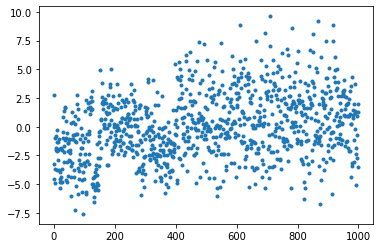

In [88]:
plt.plot(X[0],'.')

In [89]:
X[0]

array([-4.56869316e+00,  2.80286574e+00, -3.26911306e+00, -3.64415097e+00,
       -4.86848783e+00, -9.65597332e-01, -1.84434021e+00, -1.98607552e+00,
       -7.70851791e-01, -3.77996731e+00, -2.08621144e+00, -1.35867596e+00,
       -2.61318386e-01, -2.90383315e+00, -1.34829962e+00, -2.05813861e+00,
       -1.10030532e+00, -1.92782712e+00, -3.73936582e+00, -3.89826822e+00,
       -5.33933449e+00, -4.58299923e+00, -4.82598066e+00, -4.34302616e+00,
       -4.82119513e+00, -1.86031735e+00, -4.76754284e+00, -3.70583582e+00,
       -2.04656959e+00, -4.34881777e-01, -9.76779342e-01,  8.34767699e-01,
        1.40259504e+00, -2.19137597e+00, -1.66990268e+00, -3.05303931e+00,
        1.75815952e+00, -1.14808536e+00,  1.60776377e+00,  5.16966522e-01,
       -4.64383650e+00, -9.70333159e-01, -3.10047340e+00, -5.40915012e-01,
       -4.84726858e+00, -1.41291666e+00, -1.45449090e+00, -2.10749531e+00,
       -4.30701351e+00, -2.91093826e+00, -1.19875038e+00, -1.05108380e+00,
       -1.99142134e+00, -

In [90]:
np.argmax(X[0])

709

In [91]:
labels[948]

'Granny Smith'

In [92]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [93]:
for i in top_ten:
    print(labels[i])

pencil box, pencil case
tray
jigsaw puzzle
comic book
screen, CRT screen
packet
television, television system
web site, website, internet site, site
wallet, billfold, notecase, pocketbook
monitor


In [94]:
labels[]

SyntaxError: ignored

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


https://tensorspace.org/